In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tabulate import tabulate
from scipy.stats import beta

In [3]:
# load example datas
ex_data1 = pd.read_csv('data_9E_1.csv')

d2 = [0, 0, 1.128, 1.693, 2.059, 2.326, 2.534, 2.704, 2.847, 2.970, 3.078]

In [14]:
def tabular_cusum(data, h: int = 5, target: int = None, std: int = None):
    
    period = np.reshape(np.arange(data.shape[0]) + 1, (data.shape[0], 1))
    data = np.reshape(np.array(data), (data.shape[0], 1))
    
    if target is None:
        target = np.mean(data)
    
    if std is None:
        rbar = []
        for i in range(data.shape[0] - 1):
            rbar.append(abs(data[i] - data[i + 1]))
        
        std = np.mean(rbar) / d2[2]

    
    K = std / 2
    H = std * h
    LCL = - H
    UCL = H
    center = 0
    
    # numpy array
    c_plus = np.zeros((data.shape[0], 1))
    c_minus = np.zeros((data.shape[0], 1))
    count_p = np.zeros((data.shape[0], 1))
    count_m = np.zeros((data.shape[0], 1))

    for i in range(data.shape[0] - 1):
        c_plus[(i+1)] = max(0, (data[i+1] - (target + K) + c_plus[i]))
        c_minus[(i+1)] = max(0, (-data[i+1] + (target - K) + c_minus[i]))
        
        if c_plus[i+1] > 0:
            count_p[i+1] = count_p[i] + 1
        
        else:
            count_p[i+1] = 0
        
        if c_minus[i+1] < 0:
            count_m[i+1] = count_m[i] + 1
        
        else:
            count_m[i+1] = 0
        
    tabular_CUSUM = np.hstack((period, data, c_plus, count_p, c_minus, count_m))
    print(tabulate(tabular_CUSUM, headers=['Period', 'Input', 'C_Plus', 'N_Plus', 'C_Minus', 'N_Minus']))
    print(f'K = {K} & H = {H}')
    
    return c_plus, c_minus, LCL, UCL, center, count_p, count_m


In [15]:
c_plus, c_minus, LCL, UCL, center, count_p, count_m = tabular_cusum(ex_data1['x'], target=1050, std=25)


  Period    Input    C_Plus    N_Plus    C_Minus    N_Minus
--------  -------  --------  --------  ---------  ---------
       1     1045       0           0        0            0
       2     1055       0           0        0            0
       3     1037       0           0        0.5          0
       4     1064       1.5         1        0            0
       5     1095      34           2        0            0
       6     1008       0           0       29.5          0
       7     1050       0           0       17            0
       8     1087      24.5         1        0            0
       9     1125      87           2        0            0
      10     1146     170.5         3        0            0
      11     1139     247           4        0            0
      12     1169     353.5         5        0            0
      13     1151     442           6        0            0
      14     1128     507.5         7        0            0
      15     1238     683           8   

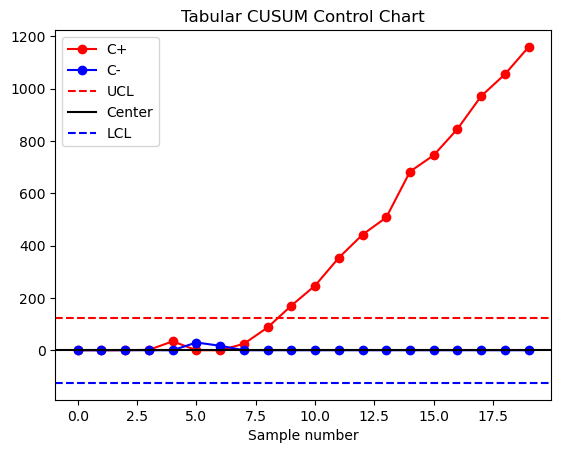

In [16]:
# fig = plt.figure(figsize=(15, 8))
plt.plot(c_plus, marker='o', color='r', label='C+')
plt.plot(c_minus, marker='o', color='b', label='C-')
plt.axhline(UCL, color='r', label='UCL', linestyle='--')
plt.axhline(center, color='black', label='Center')
plt.axhline(LCL, color='b', label='LCL', linestyle='--')
plt.legend()
plt.title('Tabular CUSUM Control Chart')
plt.xlabel('Sample number')
plt.show()

In [18]:
for period, c_p in zip(np.arange(ex_data1['x'].shape[0] + 1), c_plus):
    if c_p > UCL:
        print(f'First "out of control" at period {period}')
        break


First "out of control" at period 9


In [67]:
sum=0
mr = 0
MR = []


for i in range(1,len(ex_data1['x'])):
    MR.append(abs(ex_data1['x'].iloc[i]-ex_data1['x'].iloc[i-1]))

print(np.mean(MR))

38.8421052631579


In [84]:
def tabular_cusum(data, h: int = 5, target: int = None, std: int = None):

    period = np.reshape(np.arange(data.shape[0]) + 1, (data.shape[0], 1))
    data = np.reshape(np.array(data), (data.shape[0], 1))
    '''
    if target is None:
        target = np.mean(data)
    
    if std is None:
        rbar = []
        for i in range(data.shape[0] - 1):
            rbar.append(abs(data[i] - data[i + 1]))
        
        std = np.mean(rbar) / d2[2]
    '''
    K = 0.5
    H = h
    LCL = - H
    UCL = H
    center = 0
    
    # numpy array
    c_plus = np.zeros((data.shape[0], 1))
    c_minus = np.zeros((data.shape[0], 1))
    count_p = np.zeros((data.shape[0], 1))
    count_m = np.zeros((data.shape[0], 1))

    for i in range(data.shape[0] - 1):
        c_plus[(i+1)] = max(0, (((data[i+1]-target)/std) - K + c_plus[i]))
        c_minus[(i+1)] = max(0, (-((data[i+1]-target)/std) - K + c_minus[i]))
        
        if c_plus[i+1] > 0:
            count_p[i+1] = count_p[i] + 1
        
        else:
            count_p[i+1] = 0
        
        if c_minus[i+1] < 0:
            count_m[i+1] = count_m[i] + 1
        
        else:
            count_m[i+1] = 0
        
    tabular_CUSUM = np.hstack((period, data, c_plus, count_p, c_minus, count_m))
    print(tabulate(tabular_CUSUM, headers=['Period', 'Input', 'C_Plus', 'N_Plus', 'C_Minus', 'N_Minus']))
    print(f'K = {K} & H = {H}')
    
    return c_plus, c_minus, LCL, UCL, center, count_p, count_m


In [85]:
data1=ex_data1['x']
data1 = (data1-1050)/25
c_plus, c_minus, LCL, UCL, center, count_p, count_m = tabular_cusum(data1, target=0, std=1)


  Period    Input    C_Plus    N_Plus    C_Minus    N_Minus
--------  -------  --------  --------  ---------  ---------
       1    -0.2       0            0       0             0
       2     0.2       0            0       0             0
       3    -0.52      0            0       0.02          0
       4     0.56      0.06         1       0             0
       5     1.8       1.36         2       0             0
       6    -1.68      0            0       1.18          0
       7     0         0            0       0.68          0
       8     1.48      0.98         1       0             0
       9     3         3.48         2       0             0
      10     3.84      6.82         3       0             0
      11     3.56      9.88         4       0             0
      12     4.76     14.14         5       0             0
      13     4.04     17.68         6       0             0
      14     3.12     20.3          7       0             0
      15     7.52     27.32         8   

In [ ]:
def EWMA(data, target: int = None, std: int = None, rate: float = None, width: float = None):
    
    period = np.reshape(np.arange(data.shape[0]) + 1, (data.shape[0], 1))
    data = np.reshape(np.array(data), (data.shape[0], 1))
    
    if target is None:
        target = np.mean(data)
    
    if std is None:
        rbar = []
        for i in range(data.shape[0] - 1):
            rbar.append(abs(data[i] - data[i+1]))
        
        std = np.mean(rbar) / d2[2]
    
    z = np.zeros((data.shape[0]+1, 1))
    EWMA_UCL = np.zeros((data.shape[0]+1, 1))
    EWMA_LCL = np.zeros((data.shape[0]+1, 1))
    
    z[0] = target
    
    for i in range(1, data.shape[0] + 1):
        z[i] = rate * data[i-1] + (1 - rate) * z[i-1]
    
    for i in range(data.shape[0] + 1):
        EWMA_UCL[i] = target + width * std * np.sqrt(rate/(2-rate) * (1-np.power(1-rate, 2*i)))
        EWMA_LCL[i] = target - width * std * np.sqrt(rate/(2-rate) * (1-np.power(1-rate, 2*i)))
    
    print(f'Rate = {rate} & Width = {width}')
    
    print('EWMA Statistics Table')
    tabular_EWMA = np.hstack((period, data, z[1:], EWMA_UCL[1:], EWMA_LCL[1:]))
    print(tabulate(tabular_EWMA, headers = ['Period', 'Input', 'Z_value', 'UCL', 'LCL']))
    
    return z, EWMA_UCL, EWMA_LCL, target    